## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# We can use shape to display the numbers of rows quickly.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# I find this information using the nunique function.
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Since the converted column displays 0's and 1's, to get the proportion of converted users, we can use the mean function.
prop_conv = df['converted'].mean()*100
prop_conv

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# We'll use the groupby function, combined with the nunique for the user_id column.
# Then we will sum up the values where new_page and treatment don't match.
lineups = df.groupby(['landing_page', 'group'])['user_id'].nunique()
lineups

landing_page  group    
new_page      control        1928
              treatment    145310
old_page      control      145274
              treatment      1965
Name: user_id, dtype: int64

In [7]:
sum_lineups = lineups[0] + lineups[3]
sum_lineups

3893

In [93]:
# We can also get this number as per below, which will do the comparison for us, rather than showing us all the different
# values and us computing the different values manually, as done in the sum_lineups above.

In [8]:
df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')]['user_id'].count()

3893

f. Do any of the rows have missing values?

In [9]:
# using the info function we can see that there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# First we'll create a new df, as a copy of the original.
df2 = df
# Then we'll drop those rows we were not interested in, and we can use the code we already had above to create an invalid_rows.
invalid_rows = df2[(df2['group'] == 'treatment') != (df2['landing_page'] == 'new_page')]
# Now we'll drop the invalid_rows.
df2.drop(invalid_rows.index, inplace=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0.
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# We will add a column called duplicate which will have the value True stored for the duplicated user_id, using the duplicated
# function on the user_id column.
df2['duplicate'] = df2['user_id'].duplicated()
# Then we just have to ask for the user_id where duplicate is True, as below.
df2[(df2['duplicate'] == True)]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
# Again, here we're just asking to see the row where duplicate is True.
df2[(df2['duplicate'] == True)]

,user_id,timestamp,group,landing_page,converted,duplicate
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Using the drop function once more. We're again saying, where 
# duplicate is True, take the index as reference as to which row to delete.
df2.drop(df2[(df2['duplicate'] == True)].index, inplace=True)

In [16]:
# Double checking my values are now unique.
print(df2.count())
print(df2.nunique())

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
duplicate       290584
dtype: int64
user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
duplicate            1
dtype: int64


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# Once again, since values are 0's and 1's, we can calculate the probability 
# of an individual converting using the mean function.
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Let's take those that are in the control group.
control_users = df2.query('group == "control"')
# Then we check how many converted, using the mean.
control_users.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Same as above, but for the treatment group.
treatment_users = df2.query('group == "treatment"')
treatment_users.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# Let's take those that received the new page.
new_page = df2.query('landing_page == "new_page"')
# Now we can just say, the probability of receiving the new page is
# the amount of users that received the new page divided by the total amount 
# of users. We can use the shape function to do this easily, as seen before.
new_page_prob = new_page.shape[0]/ df2.shape[0]
new_page_prob

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Considering the treatment page converted with a percentage of 11,88% and the control page converted with a percentage of 12,03% there is not enough evidence to support that the treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The Null Hypothesis would be that the old page is equal or better then the new page, while the Alternative Hypothesis would be that the new page is better then the old page.**

$$ Null\ Hypotheses:\ H_0: p_{old} - p_{new}\geq 0$$
$$ Alternative\ Hypotheses:\ H_1: p_{old} - p_{new} \lt 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# Nothing new in the below lines.
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new = df2.query('group == "treatment"').shape[0] 
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2.query('group == "control"').shape[0] 
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Let's set our seed.
np.random.seed(42)
# Now we can use the random.choice function.
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
new_page_converted.mean()

0.11849150092904824

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# Same as above.
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
old_page_converted.mean()

0.12088880322700551

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# Now we can get the difference, as below.
p_diff_obs = new_page_converted.mean() - old_page_converted.mean()
p_diff_obs

-0.002397302297957274

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
# As seen many times in the lessons, we can create a sampling distribution 
# using the bootstrap method. I'm going to use the random.binomial function this time, inside my for loop.
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

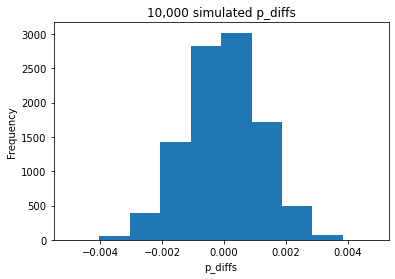

In [29]:
# Here we're using the hist function, and labeling our axis x and y, aswell as adding a title.
plt.hist(p_diffs);
plt.xlabel('p_diffs');
plt.ylabel('Frequency');
plt.title('10,000 simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# We can calculate the difference from the original dataset ab_data.csv as follows:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()

# Let's convert p_diffs to an array.
p_diffs = np.array(p_diffs)

# The proportion of p_diffs that are greater than the actual difference observed in ab_data.csv is computed as:
(act_diff < p_diffs).mean()

0.901

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We're calculating the P value above. This is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. With a P value of 0.901 we see that there is not enough evidence to reject the Null Hypothesis .**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm
# We'll sum up the 1's from the control group and treatment group.
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
# As requested n_old and n_ new match up to the number of rows, respectively.
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**With a z_score of -1.3109241984234394  and a P-value of 0.9050583127590245 we can agree with our findings in parts j. and k., which is that we fail to reject the Null hypothesis.**

In [33]:
from scipy.stats import norm
# The norm.cdf function shows us how significant our z-score is.
print(norm.cdf(z_score))

# The critical Z score value for a one tailed test at confidence level of 95%.
print(norm.ppf(1-(0.05)))


0.09494168724097551
1.6448536269514722


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# Let's add the intercept column first.
df2['intercept'] = 1
# Now let's create the dummies.
ab_page = ['treatment', 'control']
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:54:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.19 which is lower than the p-value calculated using the z-score function.<br>The reason why this is different is due to the intercept we added.<br>Logistic regression determines only two possible outcomes. Either the new page and old page are equal or not.**
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} != 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other than the page they visited, we could include many other variables, which could help us better understand the data.<br> Things like, which device did they visit our website on, how long were they looking at the page for could all be useful.<br>In addition, we could segment our data into different groups, based on area, age, etc, if we had this data.<br>The disadvantages to adding additional variables into the regression model is that even doing so, we can never account for all influencing factors.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
countries_df = pd.read_csv('./countries.csv')
# Now that it's loaded in, let's take a quick look.
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Let's create a new dataframe where we will join both dataframes via the user_id.
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# And of course, let's take a look at what this looks like.
df_new.head()

,country,timestamp,group,landing_page,converted,duplicate,intercept,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1


In [39]:
# Let's create the dummy variables.
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
# Let's take another quick look.
df_new.head()

,country,timestamp,group,landing_page,converted,duplicate,intercept,ab_page,CA,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,0


In [40]:
# Let's take a look at the model.
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:               1.521e-05
Time:                        21:54:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

**The P-values of 0.074 & 0.456 indicate that we cannot reject the Null Hypothesis. Countries do not have a big influence in conversion rates.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
# Let's create the additional columns specifying what user/country converted.
df_new['ca_page'] = df_new['CA'] * df_new['ab_page']
df_new['us_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,duplicate,intercept,ab_page,CA,US,ca_page,us_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,False,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,False,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,False,1,1,0,0,0,0


In [42]:
# Now we'll fit our Linear model and obtain our results.
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US', 'ca_page', 'us_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:54:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
ca_page       -0.0783      0.057     -1.378      0.168      -0.190       0.033
us_page       -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

**After analyzing the data we found the same results over and over, which are that there is not enough evidence to reject the Null Hypothesis.<br> The Null Hypothesis is that the old page is equal or better than the new page.<br>This was also reflected in our histogram.<br> From the regression above, again our high P-values indicate the same, not enough evidence to reject the Null Hypothesis.**

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.